In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [55]:
eth = pd.read_csv('./data/ohlcv_hour.csv')

In [56]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(eth['close'].values.reshape(-1,1))

In [57]:
time_intervals_to_train = 24
prediction_interval = 12

X_train, y_train = [], []

for i in range(time_intervals_to_train, len(scaled_data) - prediction_interval):
    X_train.append(scaled_data[i - time_intervals_to_train: i, 0])
    y_train.append(scaled_data[i + prediction_interval, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.LSTM(64, return_sequences=True, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
775/775 [==============================] - 19s 21ms/step - loss: 0.0034 - accuracy: 4.0349e-05
Epoch 2/10
775/775 [==============================] - 16s 21ms/step - loss: 6.8128e-04 - accuracy: 4.0349e-05
Epoch 3/10
775/775 [==============================] - 16s 21ms/step - loss: 6.4688e-04 - accuracy: 4.0349e-05
Epoch 4/10
775/775 [==============================] - 16s 21ms/step - loss: 5.9244e-04 - accuracy: 4.0349e-05
Epoch 5/10
775/775 [==============================] - 16s 21ms/step - loss: 5.8292e-04 - accuracy: 4.0349e-05
Epoch 6/10
775/775 [==============================] - 16s 21ms/step - loss: 5.8105e-04 - accuracy: 4.0349e-05
Epoch 7/10
775/775 [==============================] - 16s 21ms/step - loss: 5.7917e-04 - accuracy: 4.0349e-05
Epoch 8/10
775/775 [==============================] - 16s 21ms/step - loss: 5.7133e-04 - accuracy: 4.0349e-05
Epoch 9/10
775/775 [==============================] - 16s 21ms/step - loss: 5.4988e-04 - accuracy: 4.0349e-05
Epoch 10/10
77

In [59]:
eth

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,negative_sentiment,next_hour,...,trend_1,close_ratio_2,edit_2,trend_2,close_ratio_6,edit_6,trend_6,close_ratio_12,edit_12,trend_12
0,2018-05-15,732.10,736.67,730.94,733.00,1.043910e+03,1.000000,-0.228246,0.308333,707.38,...,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN
1,2018-05-15,700.99,710.15,699.05,707.38,2.558900e+02,1.000000,-0.228246,0.308333,700.99,...,0.0,0.982213,1.000000,0.0,0.982213,1.000000,0.000000,0.982213,1.000000,0.000000
2,2018-05-15,707.84,711.29,695.74,700.99,1.029830e+03,1.000000,-0.228246,0.308333,707.84,...,0.0,0.995463,1.000000,0.0,0.982068,1.000000,0.000000,0.982068,1.000000,0.000000
3,2018-05-15,712.48,714.44,707.39,707.84,1.560700e+02,1.000000,-0.228246,0.308333,712.48,...,1.0,1.004862,1.000000,0.5,0.993735,1.000000,0.333333,0.993735,1.000000,0.333333
4,2018-05-15,713.00,714.99,709.41,712.48,4.185700e+02,1.000000,-0.228246,0.308333,713.00,...,1.0,1.003267,1.000000,1.0,1.000199,1.000000,0.500000,1.000199,1.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49598,2024-01-10,2376.10,2377.80,2346.40,2348.00,2.997900e+05,0.066667,0.057137,0.000000,2377.80,...,0.0,0.996922,0.066667,0.0,0.990188,0.066667,0.333333,0.982187,0.066667,0.416667
49599,2024-01-10,2399.90,2400.60,2367.10,2377.80,7.287779e+05,0.066667,0.057137,0.000000,2398.10,...,1.0,1.006306,0.066667,0.5,1.001945,0.066667,0.500000,0.998205,0.066667,0.416667
49600,2024-01-10,2346.70,2399.50,2341.60,2398.10,6.251879e+05,0.066667,0.057137,0.000000,2360.60,...,1.0,1.004251,0.066667,1.0,1.009422,0.066667,0.500000,1.006055,0.066667,0.500000
49601,2024-01-10,2402.80,2418.30,2346.60,2360.60,1.242938e+06,0.066667,0.057137,0.000000,2589.00,...,0.0,0.992120,0.066667,0.5,0.995495,0.066667,0.333333,0.990656,0.066667,0.500000


In [60]:
test_df = pd.read_csv('./data/ohlcv_hour.csv')
mask = (test_df['Unnamed: 0'] >= '2019-01-01')
filtered_df = test_df.loc[mask]

In [61]:
ethereum_prices = pd.to_numeric(filtered_df['close'], errors='coerce').values

test_inputs = filtered_df['close'].values
test_inputs = test_inputs.reshape(-1,1)

model_inputs = scaler.fit_transform(test_inputs)

In [62]:
X_test = []

for x in range(time_intervals_to_train, len(model_inputs)):
    X_test.append(model_inputs[x - time_intervals_to_train:x, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [63]:
prediction_prices = model.predict(X_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

1377/1377 [==============================] - 10s 7ms/step


In [64]:
prediction_prices

array([[ 113.71665 ],
       [ 113.41475 ],
       [ 113.206055],
       ...,
       [2353.967   ],
       [2350.2031  ],
       [2346.438   ]], dtype=float32)

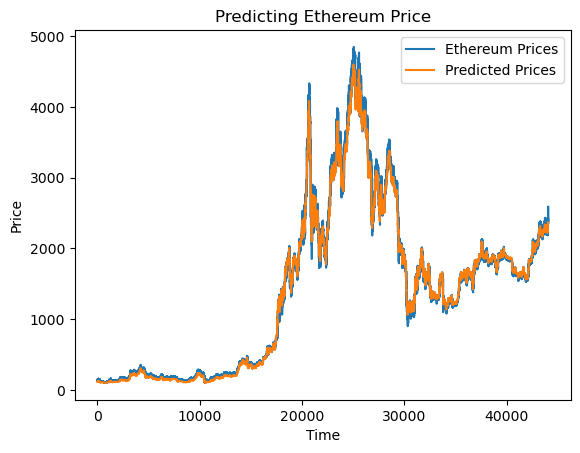

In [65]:
plt.plot(ethereum_prices, label='Ethereum Prices')
plt.plot(prediction_prices, label='Predicted Prices')
plt.title('Predicting Ethereum Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend();

In [66]:
last_data = model_inputs[len(model_inputs) + 1 - time_intervals_to_train : len(model_inputs) + 1, 0]
last_data = np.array(last_data)
last_data = np.reshape(last_data, (1, last_data.shape[0], 1))

In [67]:
prediction = model.predict(last_data)

1/1 [==============================] - 0s 322ms/step


In [68]:
prediction = scaler.inverse_transform(prediction)

In [69]:
prediction

array([[2339.165]], dtype=float32)